In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/파이낸셜/6주차/lending_data (1).csv')

# Split the dataframe into independent and dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Print the regression coefficients
coefficients = pd.DataFrame({'Variable': df.columns[:-1], 'Coefficient': log_reg.coef_.flatten()})
print(coefficients, '\n')

# Predict the target variable for the test data
threshold_list = np.arange( 0.6, 0.8, 0.05)
overall_profit_list = []
benefit_good_loan = 3
loss_bad_loan = 10

for threshold in threshold_list:
  y_pred = ( log_reg.predict_proba(X_test)[:, 1] >= threshold )
  conf_mat = confusion_matrix(y_test, y_pred)/len(y_test)
  overall_profit = benefit_good_loan*conf_mat[1,1] - loss_bad_loan*conf_mat[0,1]
  overall_profit = overall_profit.round(4)
  overall_profit_list.append(overall_profit)
# print( 'overall profits: ', overall_profit_list )
# plt.plot(threshold_list, overall_profit_list, marker='o')
# plt.xlabel('Threshold')
# plt.title('Overall Profit')
# plt.show()
print(conf_mat)

            Variable   Coefficient
0     Home Ownership  1.256367e-03
1             Income  6.991786e-07
2  DTI (Debt/Income) -4.936284e-02
3               FICO  3.224379e-03 

[[0.12184703 0.08828316]
 [0.33970708 0.45016273]]


            Variable   Coefficient
0     Home Ownership  1.256367e-03
1             Income  6.991786e-07
2  DTI (Debt/Income) -4.936284e-02
3               FICO  3.224379e-03 

Overall profits: [-0.4939, -0.4471, -0.3959, -0.3527, -0.3059, -0.229, -0.1688, -0.1204, -0.0663, 0.0037, 0.0175]


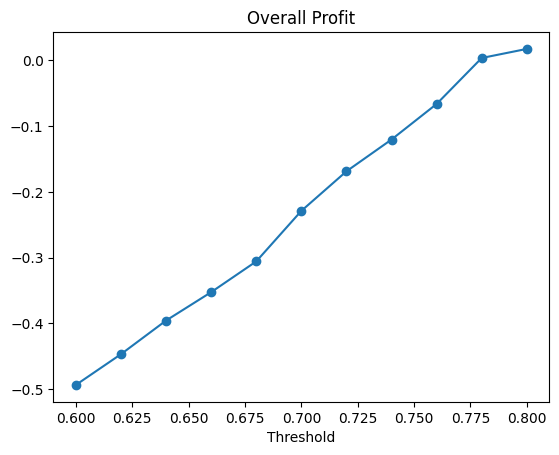

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/파이낸셜/6주차/lending_data (1).csv')

# Split the dataframe into independent and dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Print the regression coefficients
coefficients = pd.DataFrame({'Variable': df.columns[:-1], 'Coefficient': log_reg.coef_.flatten()})
print(coefficients, '\n')

# Predict the target variable for the test data
threshold_list = np.arange(0.6, 0.8, 0.02)
overall_profit_list = []
benefit_good_loan = 3
loss_bad_loan = 10
opportunity_cost = 1

for threshold in threshold_list:
  y_pred = ( log_reg.predict_proba(X_test)[:, 1] >= threshold )
  conf_mat = confusion_matrix(y_test, y_pred)/len(y_test)
  overall_profit = (benefit_good_loan - opportunity_cost) * conf_mat[1,1] - loss_bad_loan * conf_mat[0,1]
  overall_profit = overall_profit.round(4)
  overall_profit_list.append(overall_profit)
print('Overall profits:', overall_profit_list)
plt.plot(threshold_list, overall_profit_list, marker='o')
plt.xlabel('Threshold')
plt.title('Overall Profit')
plt.show()
